In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
flower_mapping = {'daisy':0, 'dandelion':1, 'rose':2, 'sunflower':3, 'tulip':4}
imagePath_train = "ml100-03-final/image_data/train/"
imagePath_test = "ml100-03-final/image_data/test/test/"

(183, 275, 3)


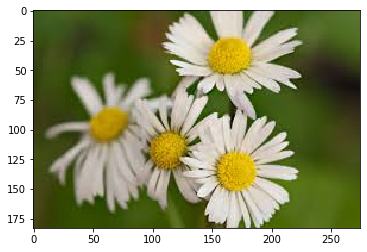

In [17]:
import cv2
img = cv2.imread(imagePath_test+"0a7fdbb3864c168137b43362874822e9.jpg", cv2.IMREAD_COLOR)
print(img.shape)
r,g,b = cv2.split(img) # 機器學習時只要所有輸入時保持相同的顏色輸入即可。
plt.imshow(cv2.merge([b,g,r]))

In [22]:
import os
XX = []
YY = []
for kind in os.listdir(imagePath_train):
    try: 
        path = imagePath_train+kind+"/"
        for imgFileName in os.listdir(path):
            id = imgFileName[:-4] # the subfilename should be ".jpg", there are 4 chars.
            XX.append(cv2.imread(path+imgFileName, cv2.IMREAD_COLOR))
            YY.append(flower_mapping[kind])
    except: 
        print("No results directory for baseline.")

No results directory for baseline.


0


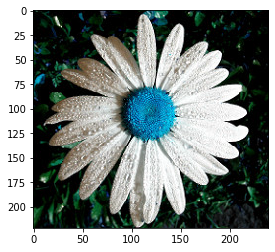

In [23]:
print(YY[0])
plt.imshow(XX[0])

In [24]:
ZZ = {}
for imgFileName in os.listdir(imagePath_test):
    ZZ[imgFileName[:-4]] = cv2.imread(imagePath_test+imgFileName, cv2.IMREAD_COLOR)

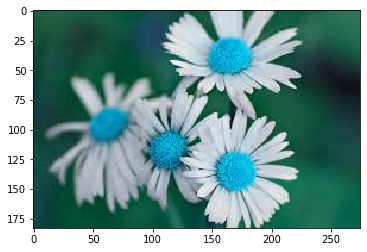

In [25]:
plt.imshow(ZZ['0a7fdbb3864c168137b43362874822e9'])

In [26]:
from PIL import Image
amount = len(XX)
image_new_shape = (128,128,3)
xx = np.empty(shape=(amount,)+image_new_shape, dtype=np.uint8)
for idx in range(amount):
    r,g,b = cv2.split(XX[idx])
    r = np.array(Image.fromarray(r).resize((128,128)))
    g = np.array(Image.fromarray(g).resize((128,128)))
    b = np.array(Image.fromarray(b).resize((128,128)))
    xx[idx] = cv2.merge([r,g,b])

(128, 128, 3)


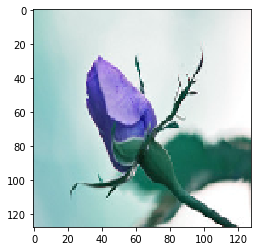

In [27]:
print(xx[501].shape)
plt.imshow(xx[501])

In [28]:
x_train = np.asarray(xx)
y_train = np.asarray(YY)
x_test = ZZ.values()

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [30]:
batch_size = 128 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 5
epochs = 30 # 訓練的 epochs 數量

In [31]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
x_train /= 255
# x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (2823, 128, 128, 3)
2823 train samples


In [32]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:], kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

for n in [128, 256]:
    model.add(Conv2D(n, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Conv2D(n, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=128, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, kernel_initializer='he_normal'))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
activation_2 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
activation_3 (Activation)    (None, 64, 64, 128)      

In [33]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)
#                     validation_data=(x_test, y_test))
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

Epoch 1/30
2823/2823 [==============================] - 3617s 1s/step - loss: 3.5500 - accuracy: 0.2604
Epoch 2/30
2823/2823 [==============================] - 5201s 2s/step - loss: 1.5947 - accuracy: 0.2951
Epoch 3/30
2823/2823 [==============================] - 5113s 2s/step - loss: 1.4732 - accuracy: 0.3680
Epoch 4/30
2823/2823 [==============================] - 5214s 2s/step - loss: 1.3012 - accuracy: 0.4633
Epoch 5/30
2823/2823 [==============================] - 5087s 2s/step - loss: 1.1957 - accuracy: 0.5190
Epoch 6/30
2823/2823 [==============================] - 5071s 2s/step - loss: 1.2535 - accuracy: 0.4896
Epoch 7/30
2823/2823 [==============================] - 5028s 2s/step - loss: 1.1529 - accuracy: 0.5505
Epoch 8/30
2823/2823 [==============================] - 5175s 2s/step - loss: 1.2789 - accuracy: 0.5027
Epoch 9/30
2823/2823 [==============================] - 5029s 2s/step - loss: 1.1037 - accuracy: 0.5682
Epoch 10/30
2823/2823 [==============================] - 5210s 2

In [ ]:
# model.save("2.l2221a9157.h5")
# from keras.models import load_model
# from keras.models import Sequential
# model = Sequential()
# model = load_model("1.h5")

In [34]:
v = list(x_test)
amount = len(x_test)
image_new_shape = (128,128,3)
zz = np.empty(shape=(amount,)+image_new_shape, dtype=np.uint8)
for idx in range(amount):
    r,g,b = cv2.split(v[idx])
    r = np.array(Image.fromarray(r).resize((128,128)))
    g = np.array(Image.fromarray(g).resize((128,128)))
    b = np.array(Image.fromarray(b).resize((128,128)))
    zz[idx] = cv2.merge([r,g,b])

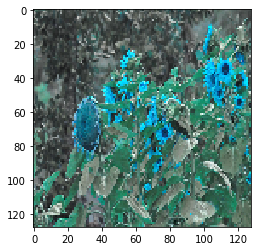

In [35]:
plt.imshow(zz[0])

In [36]:
zz = zz.astype('float32')
zz /= 255
preds = model.predict(zz)

fb5b0ec7d1f60866a8807f572aac03e8 [3.3297729e-02 9.5319045e-01 1.8151196e-03 1.1632370e-02 6.4368338e-05]


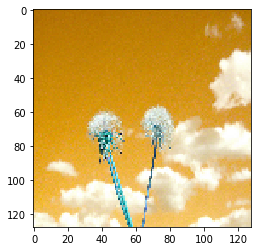

In [37]:
keys = list(ZZ.keys())
print(keys[703], preds[703])
plt.imshow(zz[703])

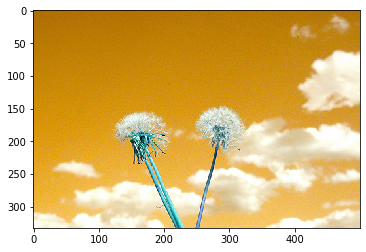

In [38]:
plt.imshow(ZZ[keys[703]])

In [39]:
import numpy as np
import pandas as pd
#prediction = pd.DataFrame(preds, columns=['predictions']).to_csv('prediction.csv')

In [41]:
# model.fit(ddtvx, ddtvy)
# my = model.predict_proba(ddzx)[:,1]
from datetime import datetime
now = datetime.today().strftime('%Y%m%d%H%M%S')
mname = type(model).__name__
print(mname, now, preds)
pd.DataFrame({'id': keys, 'flower_class': np.argmax(preds, axis=1)}).to_csv('JL_'+mname+'.'+now+'model4.csv', index=False)

Sequential 20200107232644 [[5.26650592e-06 4.91135232e-02 6.90212764e-05 9.50811982e-01
  2.46033693e-07]
 [1.29968467e-11 4.35039198e-07 1.21922055e-08 9.99998450e-01
  1.11089253e-06]
 [3.45328338e-02 2.13863999e-02 1.46236166e-01 7.71482944e-01
  2.63615623e-02]
 ...
 [6.89589534e-16 6.23649979e-19 3.38355306e-07 4.70001945e-12
  9.99999642e-01]
 [9.98646557e-01 8.46058319e-05 2.76017701e-04 3.80461273e-07
  9.92340618e-04]
 [1.91709422e-08 4.58846969e-08 6.51884258e-01 2.05961460e-05
  3.48095119e-01]]
